In [ ]:
import numpy as np
import pandas as pd
import numpy.linalg as la
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sb
sns.set_style('darkgrid')

In [ ]:
# Modeling machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import learning_curve

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaviswar45/virutalcalculator/main/train.csv')


In [ ]:
data.head(30)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
data = data.drop(['Unnamed: 0', 'id'], axis=1)


In [ ]:
 data.describe()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Text(0, 0.5, 'Frequency')

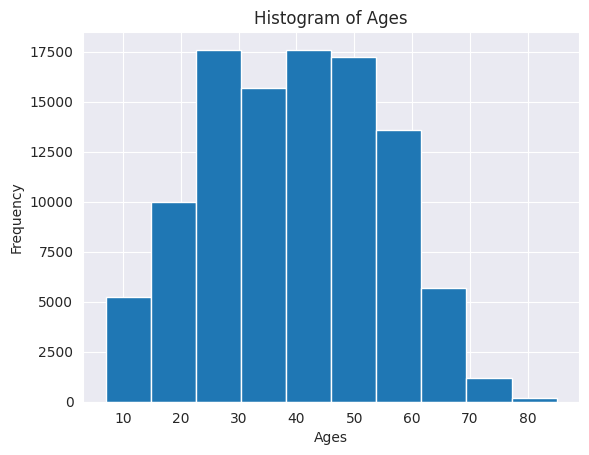

In [ ]:
#Age Distribution
data['Age'].hist(bins=10)
plt.title("Histogram of Ages")
plt.xlabel('Ages')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

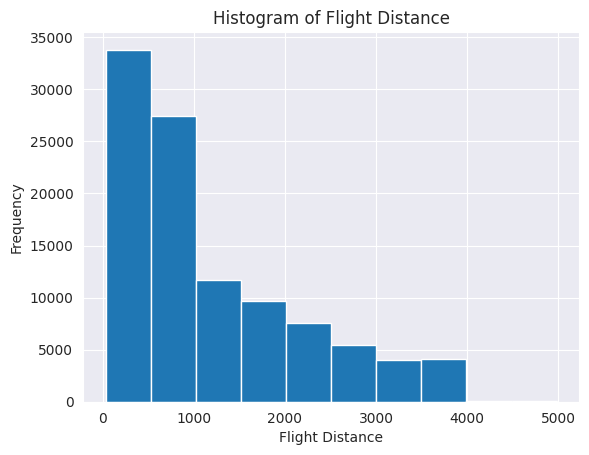

In [ ]:
#Flight Distance
data['Flight Distance'].hist(bins=10)
plt.title("Histogram of Flight Distance")
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')

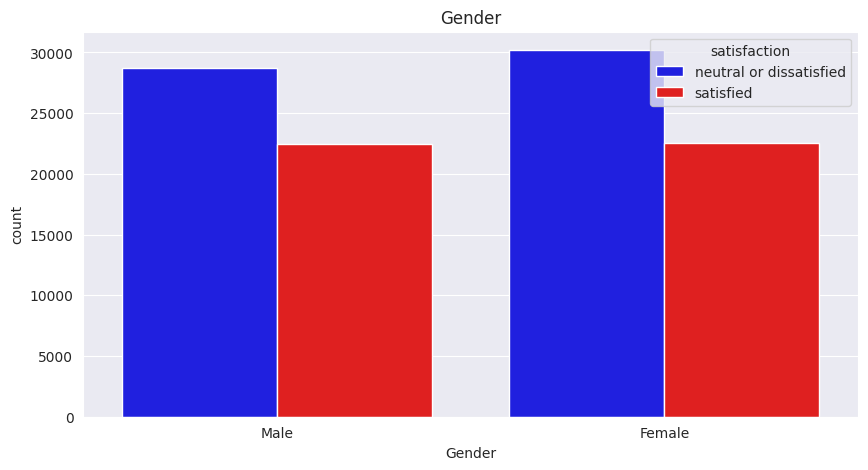

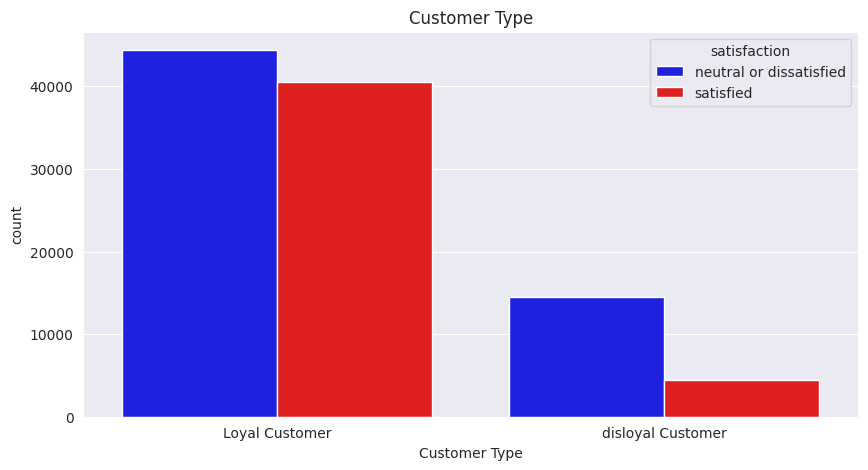

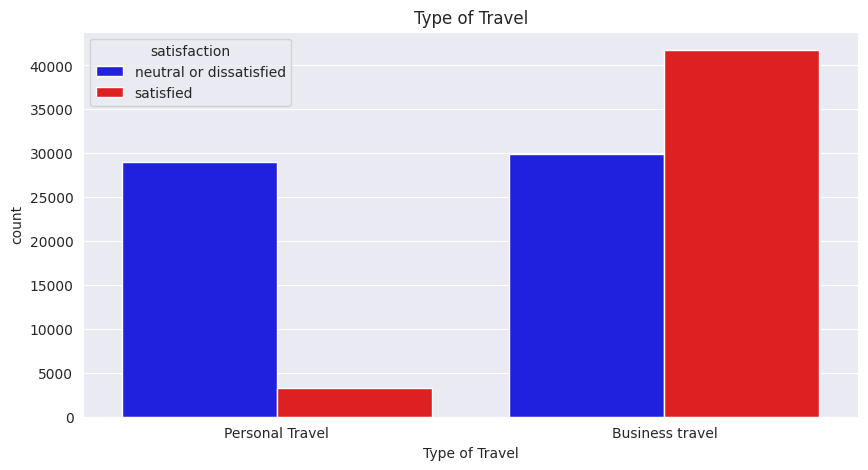

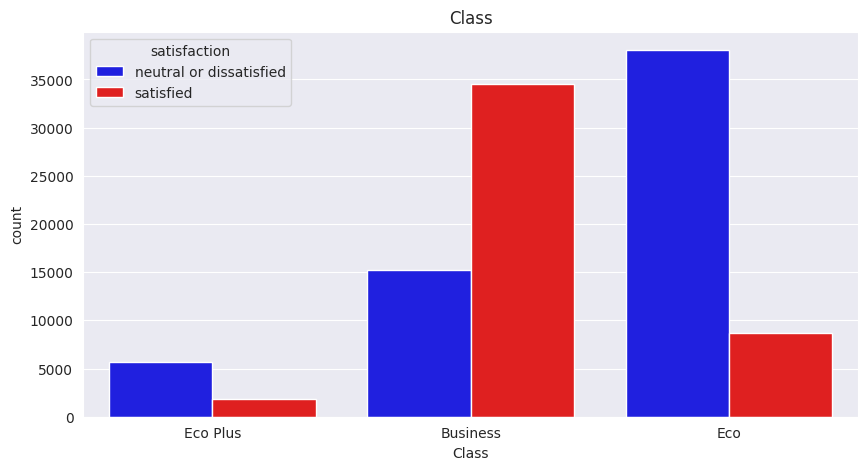

In [ ]:
#Analyze object data
for col in data.select_dtypes(include = 'object'):
    if col != 'satisfaction':
        plt.figure(figsize = (10, 5))
        plt.title(col)
        sb.countplot(x = col, data = data, hue = 'satisfaction', palette = ['blue', 'red'])
        plt.show()

In [ ]:
#Check the mean values
data.groupby('satisfaction').mean()

<ipython-input-11-5364726d928d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('satisfaction').mean()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,37.566688,928.919971,2.399633,3.129112,2.546850,2.976121,2.95805,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123,16.503728,17.127536
satisfied,41.750583,1530.140255,3.161288,2.970305,3.031582,2.977879,3.52131,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342,12.608084,12.630799


In [ ]:
data.groupby(['satisfaction', 'Gender']).mean()

<ipython-input-12-9c965e921f24>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['satisfaction', 'Gender']).mean()


Age  Flight Distance  \
satisfaction            Gender                               
neutral or dissatisfied Female  37.400225       926.917762   
                        Male    37.741895       931.027365   
satisfied               Female  41.720911      1527.814059   
                        Male    41.780312      1532.470899   

                                Inflight wifi service  \
satisfaction            Gender                          
neutral or dissatisfied Female               2.396913   
                        Male                 2.402496   
satisfied               Female               3.148087   
                        Male                 3.174514   

                                Departure/Arrival time convenient  \
satisfaction            Gender                                      
neutral or dissatisfied Female                           3.104925   
                        Male                             3.154570   
satisfied               Female                           2.968359   
                        Male                             2.972256   

                                Ease of Online booking  Gate location  \
satisfaction            Gender                                          
neutral or dissatisfied Female                2.543702       2.982281   
                        Male                  2.550164       2.969637   
satisfied               Female                3.020147       2.968670   
                        Male                  3.043039       2.987106   

                                Food and drink  Online boarding  Seat comfort  \
satisfaction            Gender                                                  
neutral or dissatisfied Female        2.987580         2.804690      3.132945   
                        Male          2.926968         2.499756      2.934567   
satisfied               Female        3.471909         3.979009      3.930594   
                        Male          3.570806         4.076030      4.002534   

                                Inflight entertainment  On-board service  \
satisfaction            Gender                                             
neutral or dissatisfied Female                2.899248          2.985195   
                        Male                  2.888796          3.054905   
satisfied               Female                3.954247          3.890299   
                        Male                  3.975635          3.824285   

                                Leg room service  Baggage handling  \
satisfaction            Gender                                       
neutral or dissatisfied Female          2.889312          3.285298   
                        Male            3.097643          3.471449   
satisfied               Female          3.873303          3.994364   
                        Male            3.770886          3.938375   

                                Checkin service  Inflight service  \
satisfaction            Gender                                      
neutral or dissatisfied Female         3.029278          3.297321   
                        Male           3.057345          3.485115   
satisfied               Female         3.641963          3.993343   
                        Male           3.650127          3.945534   

                                Cleanliness  Departure Delay in Minutes  \
satisfaction            Gender                                            
neutral or dissatisfied Female     2.967509                   16.317723   
                        Male       2.903089                   16.699505   
satisfied               Female     3.693885                   12.544333   
                        Male       3.794896                   12.671958   

                                Arrival Delay in Minutes  
satisfaction            Gender                            
neutral or dissatisfied Female                 17.053941  
                        Male                   17.205037  
s

In [ ]:
 data.groupby(['satisfaction', 'Customer Type']).mean()


<ipython-input-13-9a7f90f29114>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['satisfaction', 'Customer Type']).mean()


Age  Flight Distance  \
satisfaction            Customer Type                                   
neutral or dissatisfied Loyal Customer     39.678509      1000.468844   
                        disloyal Customer  31.096694       709.715439   
satisfied               Loyal Customer     43.269583      1618.838798   
                        disloyal Customer  28.044078       729.780053   

                                           Inflight wifi service  \
satisfaction            Customer Type                              
neutral or dissatisfied Loyal Customer                  2.401397   
                        disloyal Customer               2.394230   
satisfied               Loyal Customer                  3.099129   
                        disloyal Customer               3.722173   

                                           Departure/Arrival time convenient  \
satisfaction            Customer Type                                          
neutral or dissatisfied Loyal Customer                              3.403942   
                        disloyal Customer                           2.287114   
satisfied               Loyal Customer                              2.996447   
                        disloyal Customer                           2.734417   

                                           Ease of Online booking  \
satisfaction            Customer Type                               
neutral or dissatisfied Loyal Customer                   2.596711   
                        disloyal Customer                2.394092   
satisfied               Loyal Customer                   2.959366   
                        disloyal Customer                3.683215   

                                           Gate location  Food and drink  \
satisfaction            Customer Type                                      
neutral or dissatisfied Loyal Customer          2.953345        2.940662   
                        disloyal Customer       3.045897        3.011319   
satisfied               Loyal Customer          2.994967        3.566773   
                        disloyal Customer       2.823687        3.111086   

                                           Online boarding  Seat comfort  \
satisfaction            Customer Type                                      
neutral or dissatisfied Loyal Customer            2.731426      3.052872   
                        disloyal Customer         2.425426      2.985506   
satisfied               Loyal Customer            4.071695      4.071078   
                        disloyal Customer         3.628451      3.023152   

                                           Inflight entertainment  \
satisfaction            Customer Type                               
neutral or dissatisfied Loyal Customer                   2.849628   
                        disloyal Customer                3.030575   
satisfied               Loyal Customer                   4.060223   
                        disloyal Customer                3.105076   

                                           On-board service  Leg room service  \
satisfaction            Customer Type                                           
neutral or dissatisfied Loyal Customer             2.999932          2.933566   
                        disloyal Customer          3.078059          3.166195   
satisfied               Loyal Customer             3.873362          3.870649   
                        disloyal Customer          3.712600          3.384461   

                                           Baggage handling  Checkin service  \
satisfaction            Customer Type                                          
neutral or dissatisfied Loyal Customer             3.314395         3.037734   
                        disloyal Customer          3.564704         3.058941   
satisfied               Loyal Customer             3.950559         3.636543   
                        disloyal Customer          4.109305         3.731745   

        

In [ ]:
data.groupby(['satisfaction', 'Type of Travel']).mean()


<ipython-input-14-1d5c4ff44107>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['satisfaction', 'Type of Travel']).mean()


Age  Flight Distance  \
satisfaction            Type of Travel                                
neutral or dissatisfied Business travel  36.827778      1063.853924   
                        Personal Travel  38.329548       789.612427   
satisfied               Business travel  42.052604      1586.399056   
                        Personal Travel  37.905459       813.891430   

                                         Inflight wifi service  \
satisfaction            Type of Travel                           
neutral or dissatisfied Business travel               2.399913   
                        Personal Travel               2.399344   
satisfied               Business travel               3.126623   
                        Personal Travel               3.602623   

                                         Departure/Arrival time convenient  \
satisfaction            Type of Travel                                       
neutral or dissatisfied Business travel                           2.626133   
                        Personal Travel                           3.648395   
satisfied               Business travel                           2.915178   
                        Personal Travel                           3.672156   

                                         Ease of Online booking  \
satisfaction            Type of Travel                            
neutral or dissatisfied Business travel                2.717978   
                        Personal Travel                2.370176   
satisfied               Business travel                2.999856   
                        Personal Travel                3.435499   

                                         Gate location  Food and drink  \
satisfaction            Type of Travel                                   
neutral or dissatisfied Business travel       3.029021        2.847638   
                        Personal Travel       2.921505        3.072040   
satisfied               Business travel       2.984693        3.553227   
                        Personal Travel       2.891125        3.114974   

                                         Online boarding  Seat comfort  \
satisfaction            Type of Travel                                   
neutral or dissatisfied Business travel         2.597379      2.884516   
                        Personal Travel         2.716776      3.192993   
satisfied               Business travel         4.067551      4.025895   
                        Personal Travel         3.517231      3.210735   

                                         Inflight entertainment  \
satisfaction            Type of Travel                            
neutral or dissatisfied Business travel                2.727707   
                        Personal Travel                3.065999   
satisfied               Business travel                4.037321   
                        Personal Travel                3.043306   

                                         On-board service  Leg room service  \
satisfaction            Type of Travel                                        
neutral or dissatisfied Business travel          2.771206          2.926477   
                        Personal Travel          3.275147          3.057232   
satisfied               Business travel          3.904111          3.865520   
                        Personal Travel          3.261665          3.269899   

                                         Baggage handling  Checkin service  \
satisfaction            Type of Travel                                       
neutral or dissatisfied Business travel          3.181350         2.759738   
                        Personal Travel          3.576942         3.335347   
satisfied               Business travel          3.997173         3.670028   
                        Personal Travel          3.574565         3.340653   

                                         Inflight service  Cleanliness  \
satisfaction            Type of Travel  

In [ ]:
data.groupby(['satisfaction', 'Class']).mean()


<ipython-input-15-eb26b19a81ae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['satisfaction', 'Class']).mean()


Age  Flight Distance  \
satisfaction            Class                                  
neutral or dissatisfied Business  39.107606      1422.749095   
                        Eco       36.847834       755.787614   
                        Eco Plus  38.265664       767.477876   
satisfied               Business  42.660673      1787.498521   
                        Eco       38.547753       689.450293   
                        Eco Plus  39.845987       684.766269   

                                  Inflight wifi service  \
satisfaction            Class                             
neutral or dissatisfied Business               2.390846   
                        Eco                    2.402481   
                        Eco Plus               2.404071   
satisfied               Business               2.944635   
                        Eco                    3.866912   
                        Eco Plus               3.882863   

                                  Departure/Arrival time convenient  \
satisfaction            Class                                         
neutral or dissatisfied Business                           2.863418   
                        Eco                                3.213332   
                        Eco Plus                           3.276106   
satisfied               Business                           2.924623   
                        Eco                                3.136996   
                        Eco Plus                           3.037961   

                                  Ease of Online booking  Gate location  \
satisfaction            Class                                             
neutral or dissatisfied Business                2.758841       2.978005   
                        Eco                     2.460598       2.977263   
                        Eco Plus                2.557876       2.963363   
satisfied               Business                2.982280       2.985093   
                        Eco                     3.237674       2.948742   
                        Eco Plus                2.981020       2.980477   

                                  Food and drink  Online boarding  \
satisfaction            Class                                       
neutral or dissatisfied Business        2.878828         2.774053   
                        Eco             2.994638         2.614157   
                        Eco Plus        2.924602         2.621770   
satisfied               Business        3.518852         4.131613   
                        Eco             3.486956         3.682335   
                        Eco Plus        3.729393         3.708785   

                                  Seat comfort  Inflight entertainment  \
satisfaction            Class                                            
neutral or dissatisfied Business      2.989134                2.682121   
                        Eco           3.058984                2.979734   
                        Eco Plus      3.010265                2.887788   
satisfied               Business      4.100725                4.055278   
                        Eco           3.487990                3.616481   
                        Eco Plus      3.715293                3.919740   

                                  On-board service  Leg room service  \
satisfaction            Class                                          
neutral or dissatisfied Business          2.893052          2.853540   
                        Eco               3.073941          3.042845   
                        Eco Plus          2.989204          3.009381   
satisfied               Business          4.025812          3.992836   
                        Eco               3.323296          3.273187   
                        Eco Plus          3.226681          3.220716   

                                  Baggage handling  Checkin service  \
satisfaction            Class                                         
neutral or dissatis

In [ ]:
correlation_matrix = data.corr()
correlation_matrix

<ipython-input-16-6617581d08be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029900
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030703


In [ ]:
def preprocess(df):
    df = df.copy() #we want to create a copy of the dataframe
    df['Arrival Delay in Minutes'] =df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

    #To distinguish binary variables, we are going to use binary classification
    df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
    df['Customer Type'] = df['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1})
    df['Type of Travel'] = df['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1})
    df['satisfaction'] = df['satisfaction'].replace({'satisfied': 1, 'dissatisfied': 0})
    ##################################################################

    #One hot coding
    flight_class = pd.get_dummies(df['Class'],prefix='Flight')
    df = pd.concat([df,flight_class],axis=1)
    df = df.drop('Class',axis=1)
    return df

In [ ]:
def classify_objects(X):
    return {col: len(X[col].unique()) for col in X.select_dtypes('object').columns} ,{col: list(X[col].unique()) for col in X.select_dtypes('object').columns}

In [ ]:
class_len, class_list = classify_objects(data) #after preprocessing all the data, we are going to classify them into data classes
print('class_len:',class_len)
print('class_list:',class_list)

class_len: {'Gender': 2, 'Customer Type': 2, 'Type of Travel': 2, 'Class': 3, 'satisfaction': 2}
class_list: {'Gender': ['Male', 'Female'], 'Customer Type': ['Loyal Customer', 'disloyal Customer'], 'Type of Travel': ['Personal Travel', 'Business travel'], 'Class': ['Eco Plus', 'Business', 'Eco'], 'satisfaction': ['neutral or dissatisfied', 'satisfied']}


In [ ]:
X = preprocess(data)
X

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Flight_Business,Flight_Eco,Flight_Eco Plus
0,1,1,13,0,460,3,4,3,1,5,...,4,4,5,5,25,18.0,neutral or dissatisfied,0,0,1
1,1,0,25,1,235,3,2,3,3,1,...,3,1,4,1,1,6.0,neutral or dissatisfied,1,0,0
2,0,1,26,1,1142,2,2,2,2,5,...,4,4,4,5,0,0.0,1,1,0,0
3,0,1,25,1,562,2,5,5,5,2,...,3,1,4,2,11,9.0,neutral or dissatisfied,1,0,0
4,1,1,61,1,214,3,3,3,3,4,...,4,3,3,3,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0,23,1,192,2,1,2,3,2,...,4,2,3,2,3,0.0,neutral or dissatisfied,0,1,0
103900,1,1,49,1,2347,4,4,4,4,2,...,5,5,5,4,0,0.0,1,1,0,0
103901,1,0,30,1,1995,1,1,1,3,4,...,4,5,5,4,7,14.0,neutral or dissatisfied,1,0,0
103902,0,0,22,1,1000,1,1,1,5,1,...,1,5,4,1,0,0.0,neutral or dissatisfied,0,1,0


In [ ]:
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
def prepare_dataset_train(df):
    df = preprocess(df)
    # Scaling the continuos variables: `Age` and `Flight Distance`.
    df.loc[:,["Age","Flight Distance"]] = StandardScaler().fit_transform(df.loc[:,["Age","Flight Distance"]])
    # Scaling our categorical variables related to the satisfaction to each different aspect of the customer service
    df.loc[:,"Inflight wifi service":"Cleanliness"] = StandardScaler().fit_transform(df.loc[:,"Inflight wifi service":"Cleanliness"])

    return df

In [ ]:
data_train_prep = prepare_dataset_train(data)

In [ ]:
data_train_prep

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Flight_Business,Flight_Eco,Flight_Eco Plus
0,1,1,-1.745279,0,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,...,0.311769,0.549799,1.156436,1.305870,25,18.0,neutral or dissatisfied,0,0,1
1,1,0,-0.951360,1,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,...,-0.535045,-1.821012,0.305848,-1.742292,1,6.0,neutral or dissatisfied,1,0,0
2,0,1,-0.885200,1,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,...,0.311769,0.549799,0.305848,1.305870,0,0.0,1,1,0,0
3,0,1,-0.951360,1,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,...,-0.535045,-1.821012,0.305848,-0.980251,11,9.0,neutral or dissatisfied,1,0,0
4,1,1,1.430397,1,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,...,0.311769,-0.240472,-0.544740,-0.218211,0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,0,-1.083680,1,-1.000307,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,...,0.311769,-1.030742,-0.544740,-0.980251,3,0.0,neutral or dissatisfied,0,1,0
103900,1,1,0.636478,1,1.160869,0.956691,0.616172,0.888612,0.800803,-0.904178,...,1.158582,1.340069,1.156436,0.543829,0,0.0,1,1,0,0
103901,1,0,-0.620561,1,0.807860,-1.302646,-1.350954,-1.255895,0.018094,0.600117,...,0.311769,1.340069,1.156436,0.543829,7,14.0,neutral or dissatisfied,1,0,0
103902,0,0,-1.149840,1,-0.189991,-1.302646,-1.350954,-1.255895,1.583511,-1.656326,...,-2.228672,1.340069,0.305848,-1.742292,0,0.0,neutral or dissatisfied,0,1,0


In [ ]:
data_train_prep.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Flight_Business                      0
Flight_Eco                           0
Flight_Eco Plus                      0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'data_train_prep'
# Assuming 'satisfaction' is the target column
target_column = 'satisfaction'

# Convert the 'satisfaction' column to strings
data_train_prep[target_column] = data_train_prep[target_column].astype(str)

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(data_train_prep[target_column])

# Transform the test labels
# It's important to use the same label encoder instance for consistency
y_test_encoded = label_encoder.transform(data_train_prep[target_column])

# Drop the original 'satisfaction' column from your features
X = data_train_prep.drop([target_column], axis=1)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_train_encoded, test_size=0.30, random_state=42)

# Now, you can use X_train, X_test, y_train, and y_test in your linear regression model


In [ ]:
X_test

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Flight_Business,Flight_Eco,Flight_Eco Plus
80638,0,1,-0.885200,0,-0.329390,-0.549533,0.616172,-0.541060,1.583511,1.352264,...,0.493270,0.311769,-0.240472,1.156436,1.305870,0,0.0,0,1,0
43398,1,1,-1.149840,1,-0.798731,0.203579,1.271880,1.603448,1.583511,-0.152031,...,-1.787061,-0.535045,-1.030742,-0.544740,-0.218211,0,16.0,1,0,0
32751,0,1,1.298077,0,-0.996295,-1.302646,-0.039537,-1.255895,0.018094,-0.904178,...,-1.787061,0.311769,-0.240472,0.305848,0.543829,37,34.0,0,1,0
33571,0,1,-0.488241,0,-0.169934,-0.549533,-0.039537,-0.541060,0.800803,0.600117,...,-1.026951,0.311769,-1.821012,0.305848,0.543829,27,4.0,0,1,0
71287,1,0,-0.289761,1,-0.072656,-0.549533,-0.695245,-0.541060,-1.547323,-0.904178,...,-1.026951,-0.535045,-1.030742,-1.395328,-0.980251,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,1,1,-1.943759,0,-0.368501,-2.055758,1.271880,-1.255895,0.800803,1.352264,...,-0.266840,1.158582,-0.240472,1.156436,1.305870,0,0.0,0,1,0
4869,0,1,0.041039,1,2.152703,-1.302646,-1.350954,-1.255895,-1.547323,1.352264,...,0.493270,0.311769,-0.240472,0.305848,1.305870,48,42.0,1,0,0
93969,1,1,1.099597,0,-0.017498,-0.549533,-1.350954,-0.541060,0.018094,1.352264,...,1.253380,-0.535045,0.549799,0.305848,1.305870,30,23.0,0,1,0
78320,1,1,-0.686721,1,1.633219,0.203579,-0.039537,0.173776,0.018094,1.352264,...,-1.026951,0.311769,-0.240472,0.305848,1.305870,4,8.0,1,0,0


In [ ]:
y_test

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
##probabilistic model-Naive Bayes

In [ ]:
# Step 1: Dimensionality Reduction
n_components = 10
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
# Ensure y_train has the same number of samples as X_train_reduced
y_train = y_train[:X_train_reduced.shape[0]]

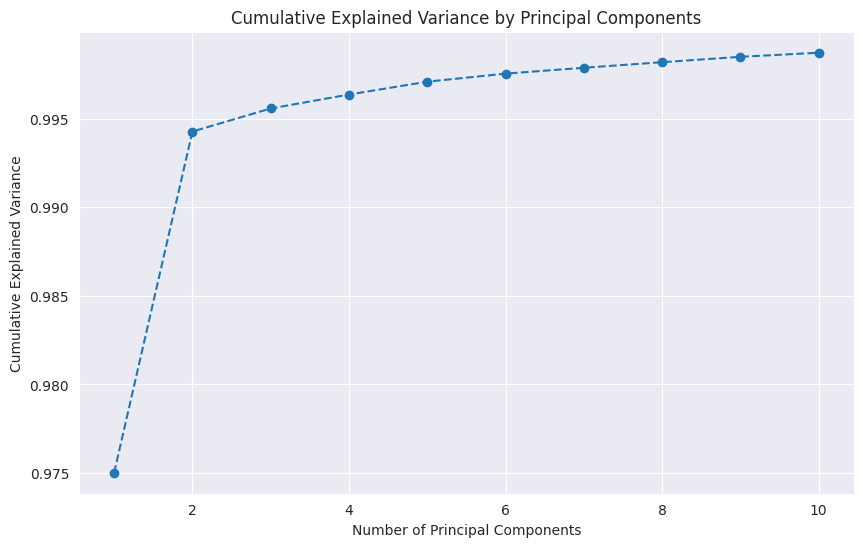

In [ ]:
# Visualize explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
# Step 2: Finding a Hyperparameter
naive_bayes = GaussianNB()
param_grid = {}  # You may add hyperparameters specific to the chosen variant

grid_search = GridSearchCV(naive_bayes, param_grid, cv=5)
grid_search.fit(X_train_reduced, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {}


In [ ]:
"""
The output shows an empty set of best hyperparameters ({}).
This might happen because Naive Bayes models, especially Gaussian Naive Bayes, have minimal hyperparameters to tune.
"""

'\nThe output shows an empty set of best hyperparameters ({}).\nThis might happen because Naive Bayes models, especially Gaussian Naive Bayes, have minimal hyperparameters to tune.\n'

In [ ]:
# Step 3: Applying Naive Bayes with the Best Hyperparameters
best_naive_bayes = GaussianNB(**best_params)
best_naive_bayes.fit(X_train_reduced, y_train)
# Make predictions on the test set
predictions = best_naive_bayes.predict(X_test_reduced)
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8305530604388554


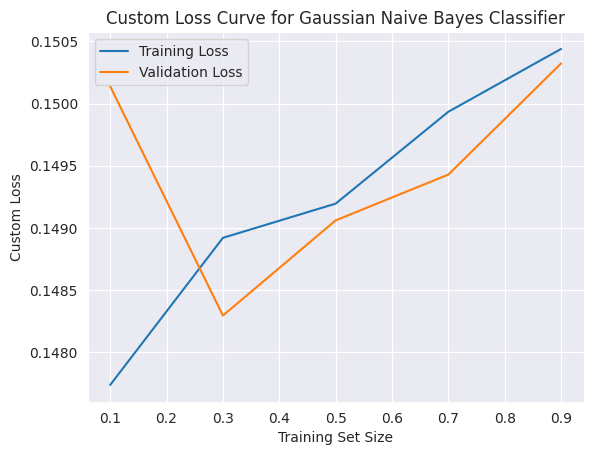

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define a custom loss function (replace this with your actual loss function)
def custom_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define the range of training set sizes
train_sizes = np.linspace(0.1, 0.9, 5)

# Create an empty list to store the training and validation losses
train_losses, val_losses = [], []

# Loop through each training set size
for train_size in train_sizes:
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y_train_encoded, train_size=train_size, random_state=42)

    # Create a Gaussian Naive Bayes classifier
    gnb = GaussianNB()

    # Fit the model on the training data
    gnb.fit(X_train, y_train)

    # Calculate the training and validation losses using your custom loss function
    train_loss = custom_loss(y_train, gnb.predict(X_train))
    val_loss = custom_loss(y_val, gnb.predict(X_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot the custom loss curve
plt.plot(train_sizes, train_losses, label="Training Loss")
plt.plot(train_sizes, val_losses, label="Validation Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Custom Loss")
plt.legend()
plt.title("Custom Loss Curve for Gaussian Naive Bayes Classifier")
plt.show()


In [ ]:
# Step 5: Performance Metrics and Classification Error
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
classification_error = 1 - accuracy

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:", accuracy)
print("Classification Error:", classification_error)

Confusion Matrix:
[[10768  2849]
 [ 2433 15122]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     13617
           1       0.84      0.86      0.85     17555

    accuracy                           0.83     31172
   macro avg       0.83      0.83      0.83     31172
weighted avg       0.83      0.83      0.83     31172


Accuracy: 0.8305530604388554
Classification Error: 0.16944693956114465


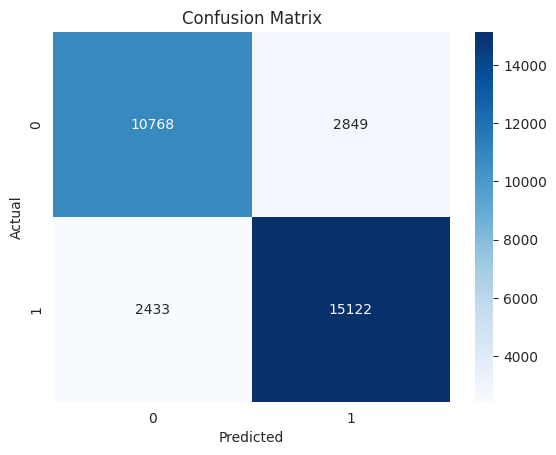

In [ ]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

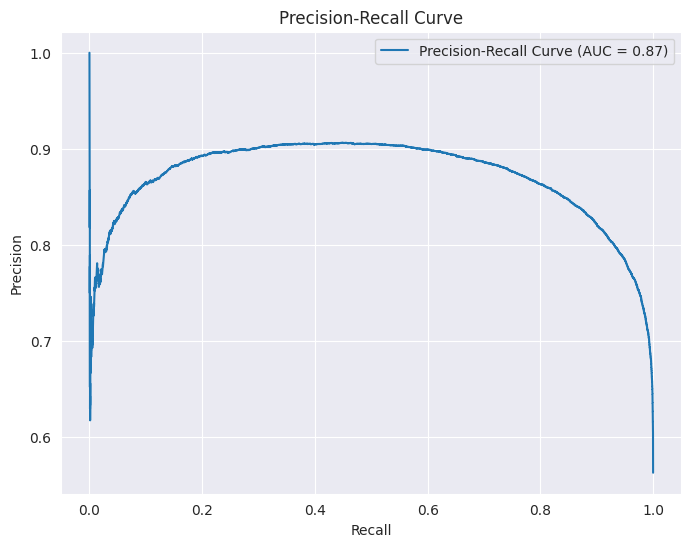

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, best_naive_bayes.predict_proba(X_test_reduced)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


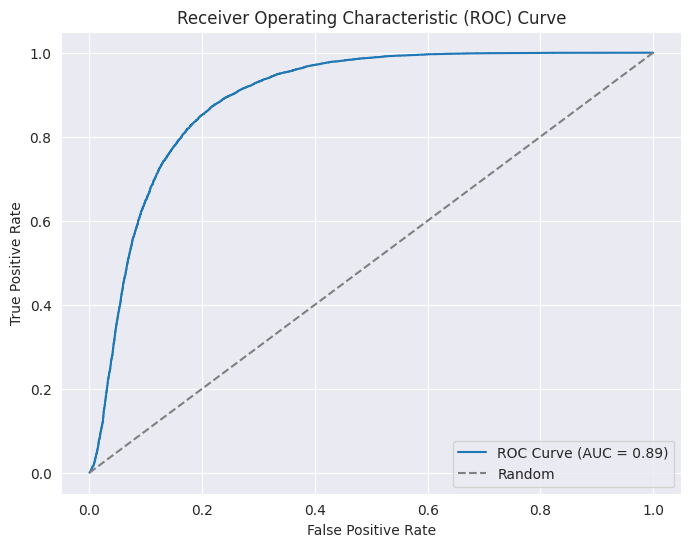

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, best_naive_bayes.predict_proba(X_test_reduced)[:, 1])
roc_auc = roc_auc_score(y_test, best_naive_bayes.predict_proba(X_test_reduced)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


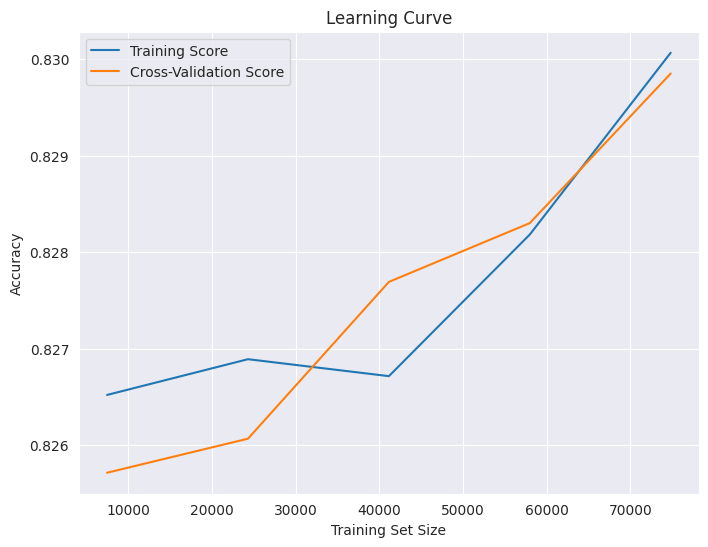

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_naive_bayes, X_train_reduced, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [ ]:
#HMM model

In [ ]:
from sklearn.decomposition import PCA

# Assuming X_train is your training data
n_components = 10  # You can choose the number of components based on your data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
pip install hmmlearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 1.6 MB/s eta 0:00:00


In [ ]:
from hmmlearn import hmm
from sklearn.model_selection import RandomizedSearchCV

# Define the model
model = hmm.GaussianHMM()

# Define a reduced search space
param_dist = {
    'n_components': [3, 4, 5],
    'covariance_type': ['diag', 'full'],
    'n_iter': [10, 15, 20]
}

# Use RandomizedSearchCV with a limited number of iterations
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1)
random_search.fit(X_train_pca)
best_params = random_search.best_params_


In [ ]:
best_n_components = best_params['n_components']
best_covariance_type = best_params['covariance_type']
best_n_iter = best_params['n_iter']

# Train the HMM model
hmm_model = hmm.GaussianHMM(n_components=best_n_components, covariance_type=best_covariance_type, n_iter=best_n_iter)
hmm_model.fit(X_train_pca)


GaussianHMM(covariance_type='full', n_components=4, n_iter=15)

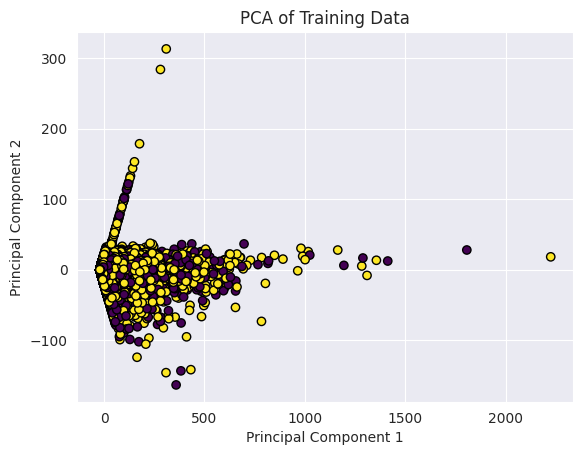

In [ ]:
import matplotlib.pyplot as plt

# Visualize the original data or some aspects of the HMM model output
# For example, you can plot the first two principal components after PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# For sequence prediction, perplexity is commonly used
perplexity_train = hmm_model.score(X_train_pca)
perplexity_test = hmm_model.score(X_test_pca)

# Print or display perplexity
print("Train Perplexity:", perplexity_train)
print("Test Perplexity:", perplexity_test)


Train Perplexity: -1185766.4243961247
Test Perplexity: -394179.11285054695


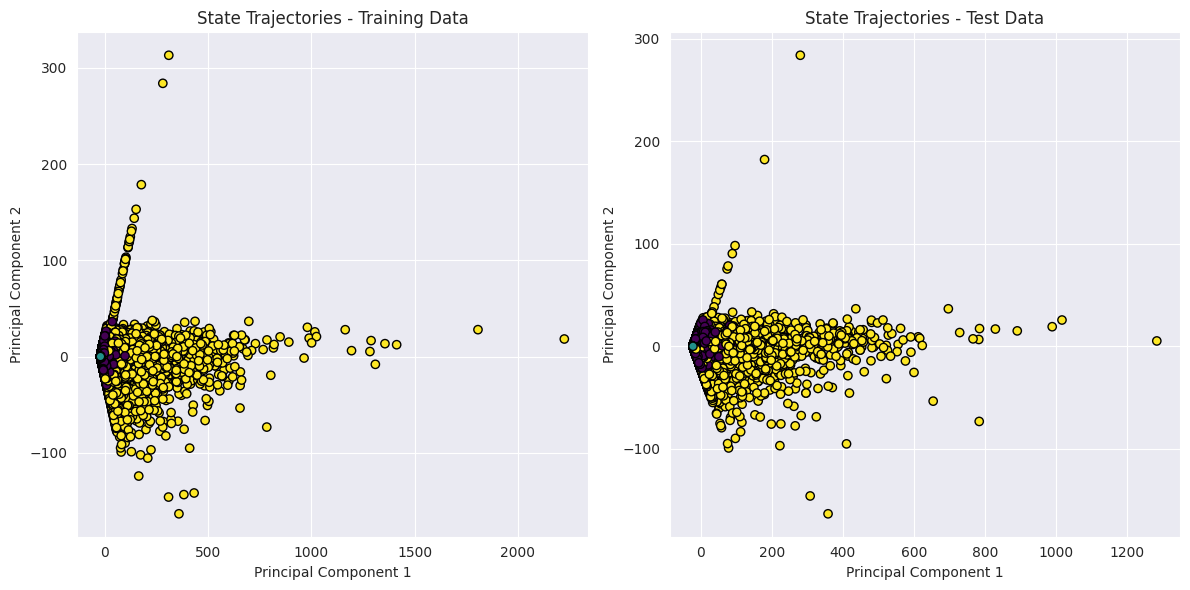

In [ ]:
# Obtain the sequence of states for each data point
state_sequence_train = hmm_model.predict(X_train_pca)
state_sequence_test = hmm_model.predict(X_test_pca)

# Plot state trajectories
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=state_sequence_train, cmap='viridis', edgecolor='k')
plt.title('State Trajectories - Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=state_sequence_test, cmap='viridis', edgecolor='k')
plt.title('State Trajectories - Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


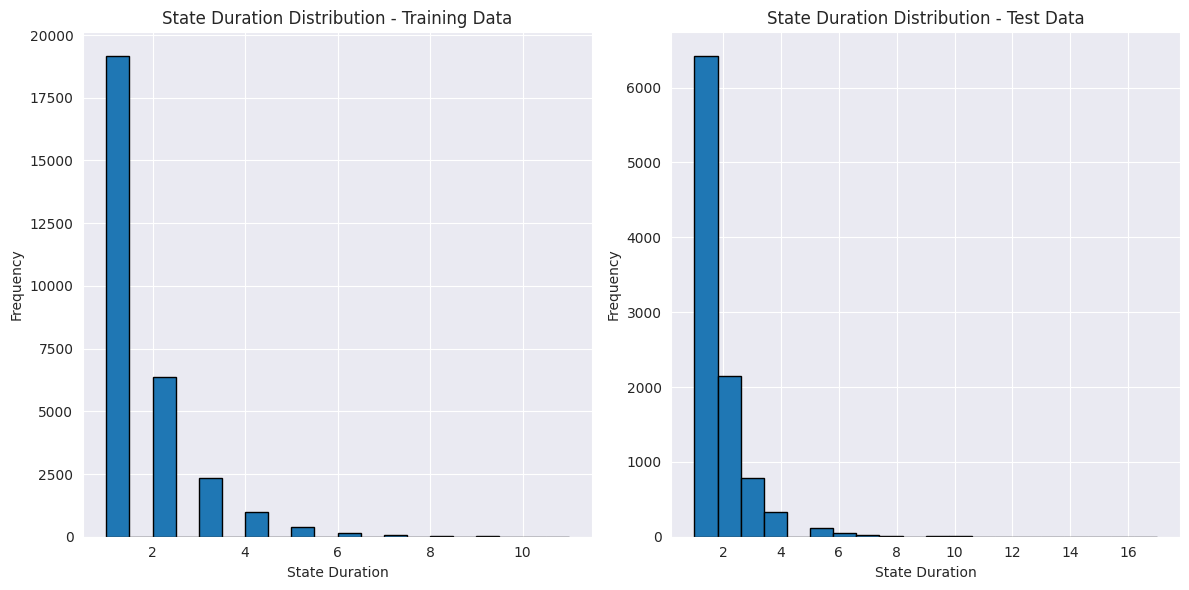

In [ ]:
# Get the state durations
state_durations_train = np.diff(np.where(np.diff(np.concatenate(([0], state_sequence_train, [0]))) != 0)[0])[::2]
state_durations_test = np.diff(np.where(np.diff(np.concatenate(([0], state_sequence_test, [0]))) != 0)[0])[::2]

# Plot state duration distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(state_durations_train, bins=20, edgecolor='k')
plt.title('State Duration Distribution - Training Data')
plt.xlabel('State Duration')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(state_durations_test, bins=20, edgecolor='k')
plt.title('State Duration Distribution - Test Data')
plt.xlabel('State Duration')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
#ensemble model-Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a more compact search space
param_dist = {
    'n_estimators': randint(50, 150),  # Random integer between 50 and 150
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 76}


In [ ]:
# Step 2: Applying Random Forest with the Best Hyperparameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_rf.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9876170922622867


In [ ]:
# Step 3: Performance Metrics
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)
classification_error = 1 - accuracy

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("Classification Error:", classification_error)

Accuracy: 0.9876170922622867

Confusion Matrix:
[[13355   262]
 [  124 17431]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     13617
           1       0.99      0.99      0.99     17555

    accuracy                           0.99     31172
   macro avg       0.99      0.99      0.99     31172
weighted avg       0.99      0.99      0.99     31172

Classification Error: 0.012382907737713333


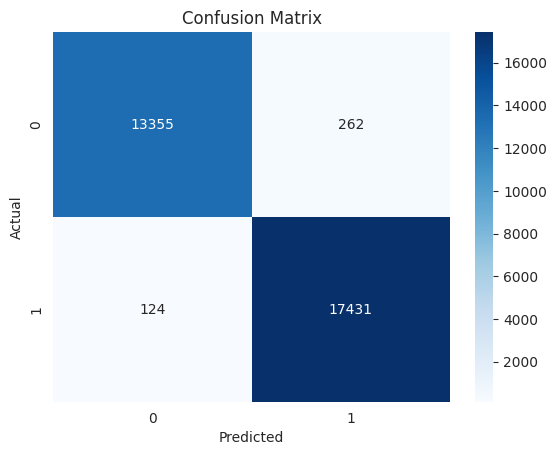

In [ ]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

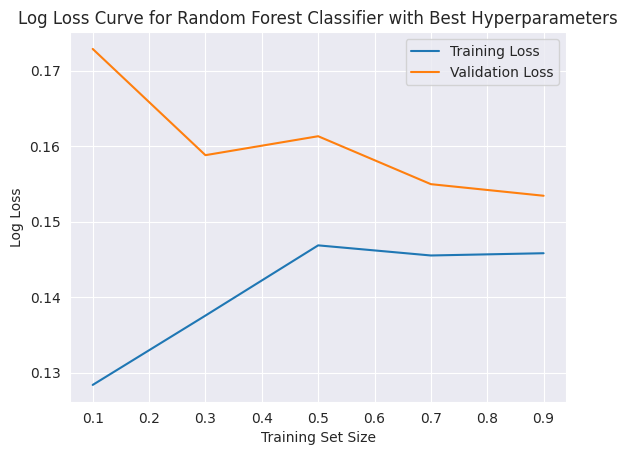

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Assume X and y_train_encoded are defined

# Define the best hyperparameters
best_params = {
    'n_estimators': 50,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

# Create a Random Forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)

# Define the range of training set sizes
train_sizes = np.linspace(0.1, 0.9, 5)

# Create empty lists to store the training and validation losses
train_losses, val_losses = [], []

# Loop through each training set size
for train_size in train_sizes:
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y_train_encoded, train_size=train_size, random_state=42)

    # Fit the model on the training data
    best_rf.fit(X_train, y_train)

    # Calculate the training and validation losses using log_loss
    train_loss = log_loss(y_train, best_rf.predict_proba(X_train))
    val_loss = log_loss(y_val, best_rf.predict_proba(X_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot the loss curve
plt.plot(train_sizes, train_losses, label="Training Loss")
plt.plot(train_sizes, val_losses, label="Validation Loss")
plt.xlabel("Training Set Size")
plt.ylabel("Log Loss")
plt.legend()
plt.title("Log Loss Curve for Random Forest Classifier with Best Hyperparameters")
plt.show()


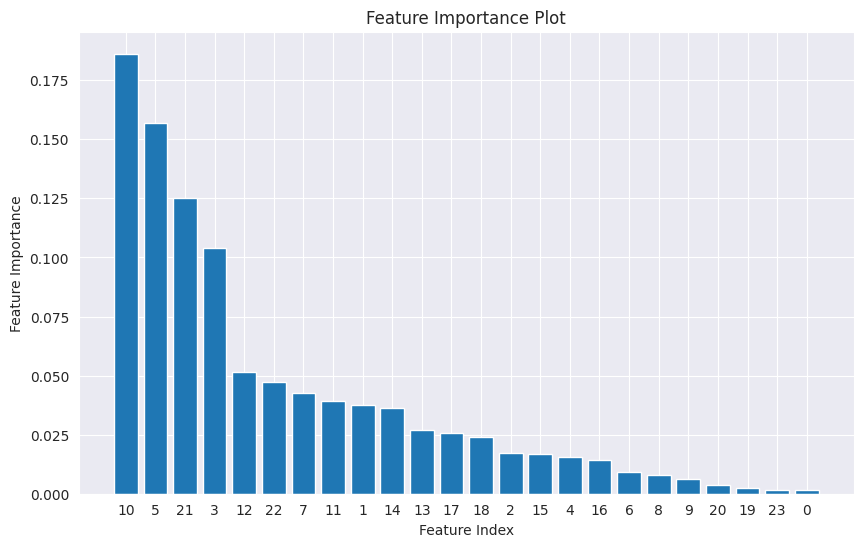

In [ ]:
# Assuming best_rf is already trained
feature_importances = best_rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.show()


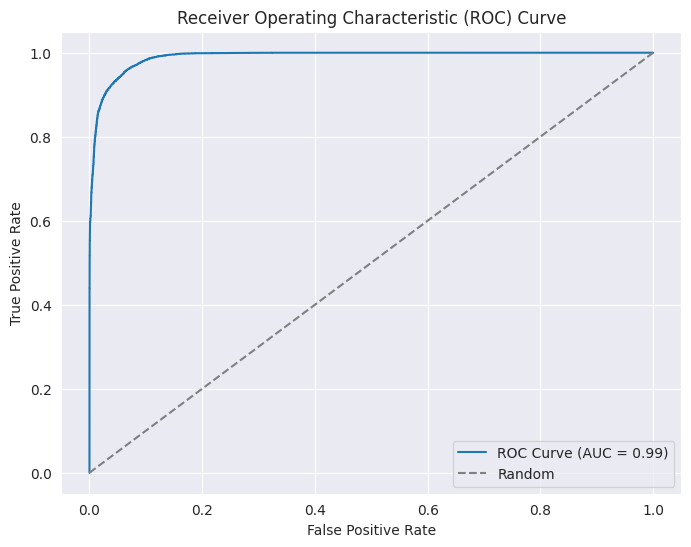

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming predictions and y_test are available
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


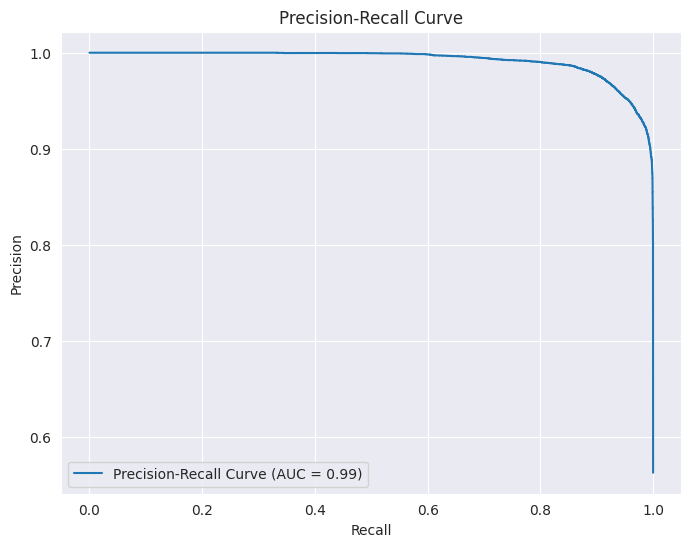

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
#decison tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Step 3: Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # Choose the number of components you want
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Step 4: Find Hyperparameters using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
# Step 5: Train the Decision Tree Model with Best Hyperparameters
best_dtree = DecisionTreeClassifier(**best_params)
best_dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=10)

<ipython-input-91-b3f1e5bc70c0>:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='x', edgecolor='k', label='Test Data')


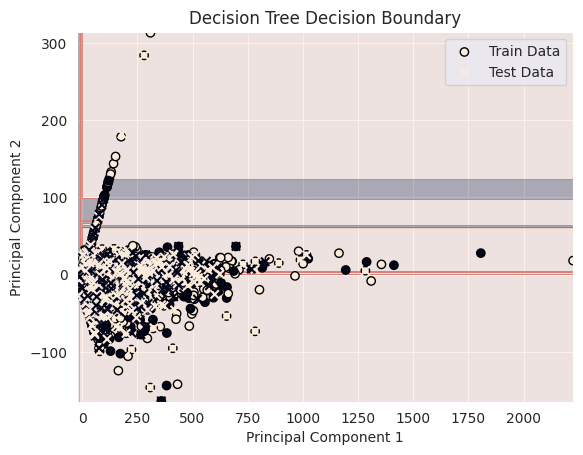

In [ ]:
# Step 6: Visualization
# Decision Boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = best_dtree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, marker='o', edgecolor='k', label='Train Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='x', edgecolor='k', label='Test Data')
plt.title('Decision Tree Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


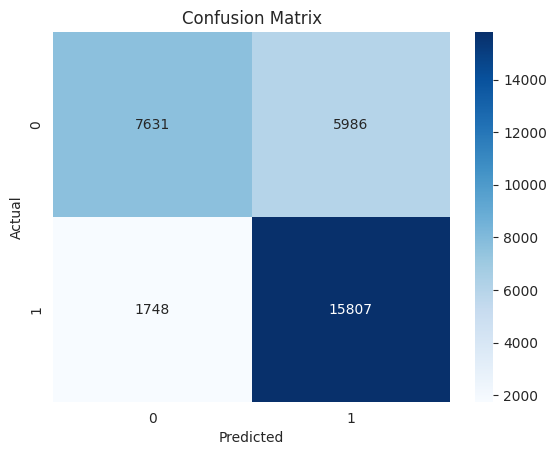

Accuracy: 0.7518927242397023
Precision: 0.763897790619762
Recall: 0.7518927242397023
F1 Score: 0.7423917886766225


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Performance Metrics
y_pred = best_dtree.predict(X_test_pca)

# Calculate confusion matrix metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display other performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Export the trained Decision Tree to a DOT file
dot_data = export_graphviz(best_dtree, out_file=None, feature_names=["Principal Component 1", "Principal Component 2"], class_names=["Class 0", "Class 1"], filled=True, rounded=True, special_characters=True)

# Visualize the DOT file using Graphviz
graph = graphviz.Source(dot_data)
graph.render("DecisionTreeVisualization")
graph.view("DecisionTreeVisualization")


'DecisionTreeVisualization.pdf'

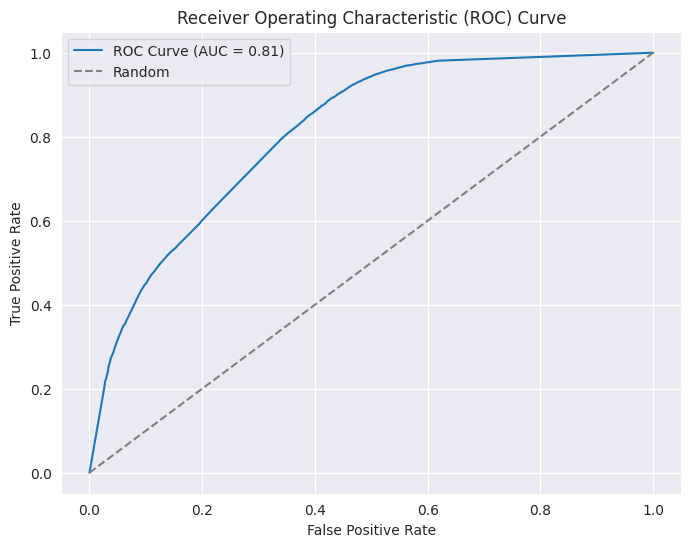

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have probabilities for positive class predictions
y_prob = best_dtree.predict_proba(X_test_pca)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


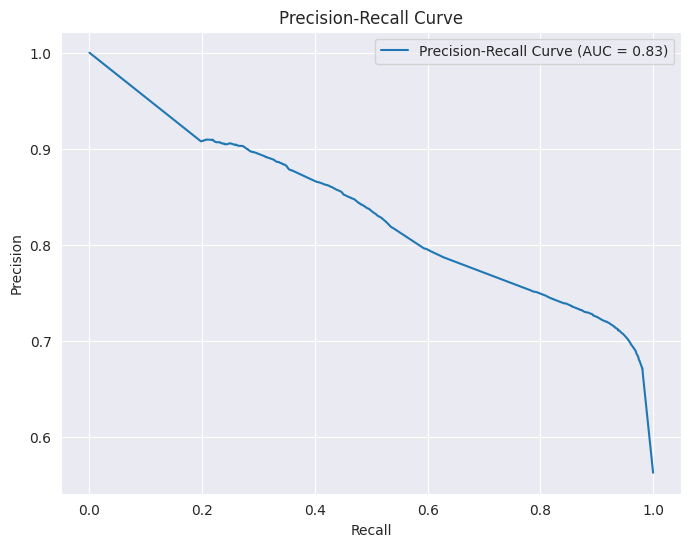

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
#unsupervised model-k-means

In [ ]:
#dimensionality reduction
from sklearn.decomposition import PCA

# Assuming X_train is your training data
pca = PCA(n_components=2)  # You can choose the number of components based on your preference or using explained variance
X_train_pca = pca.fit_transform(X_train)
# Assuming you have already defined X_test
X_test_pca = pca.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

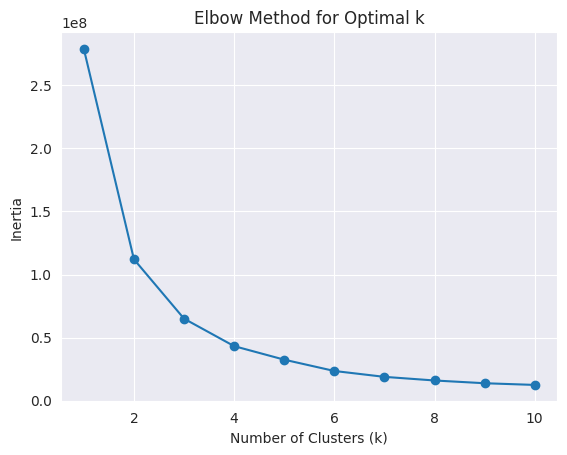

In [ ]:
#hyperparameter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Choose the value of k at the "elbow" of the curve
optimal_k_index = np.argmin(np.diff(inertias)) + 1  # Index of the value you found from the Elbow Method
optimal_k = optimal_k_index + 1  # Adding 1 because Python uses 0-based indexing
print(f'Optimal k: {optimal_k}')

Optimal k: 2


In [119]:
# K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_train_pca)
y_pred = kmeans.predict(X_test_pca)

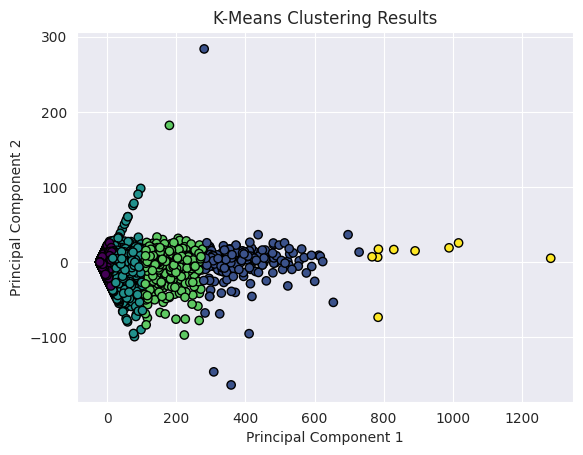

In [120]:
# Visualize Clusters
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolors='k')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [121]:
# Performance Metrics
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import cross_val_score
silhouette_avg = silhouette_score(X_test_pca, y_pred)
adjusted_rand_index = adjusted_rand_score(y_test, y_pred)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Adjusted Rand Index: {adjusted_rand_index}')

# Cross-validation for more robust evaluation
cv_scores = cross_val_score(kmeans, X_train_pca, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Silhouette Score: 0.7744716338232839
Adjusted Rand Index: -0.007152017696200506
Cross-Validation Scores: [-6403844.13830823 -6475925.26558736 -7631370.98167283 -7576968.05532119
 -5910483.54294405]


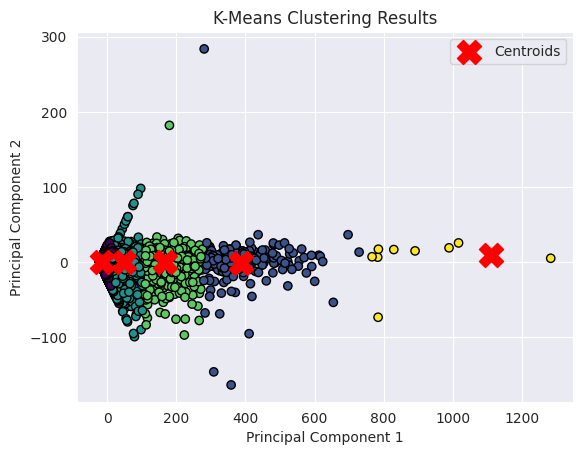

In [122]:
# Visualize Clusters with Centroids
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Assume X is your data

# Define the range of cluster numbers
n_clusters_range = range(1, 11)

# Create an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Loop through each number of clusters
for n_clusters in n_clusters_range:
    # Create a KMeans instance
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model to your data
    kmeans.fit(X_train_pca)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the WCSS curve
plt.plot(n_clusters_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS Curve for K-Means Clustering')
plt.show()


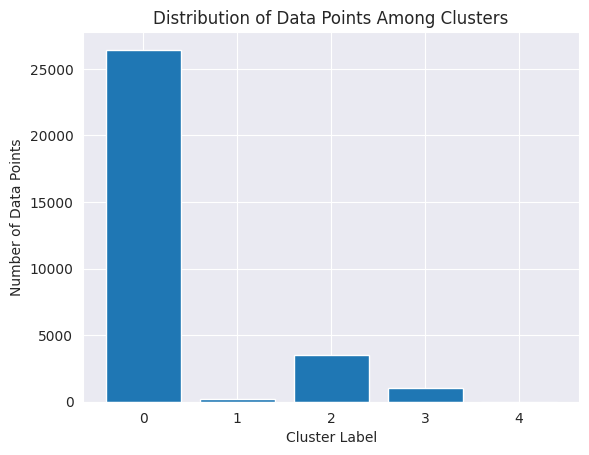

In [123]:
# Assuming y_pred contains the cluster assignments
unique, counts = np.unique(y_pred, return_counts=True)
plt.bar(unique, counts, align='center')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Among Clusters')
plt.show()


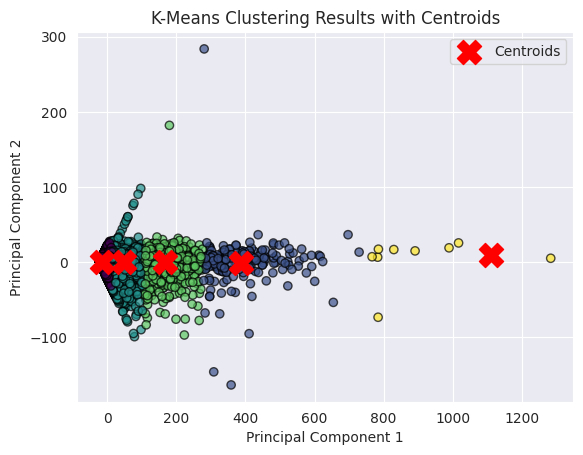

In [124]:
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolors='k', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Results with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
